In [96]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import resampy
import matplotlib
matplotlib.style.use('default')  # <-- for Jupyter: white figures background

dur = 2
sro = 500

# Load raw signals
x1, fs = sf.read('U:/py/sounds-phd/02_data/00_raw_signals/01_speech/speech1.wav')
x2, _ = sf.read('U:/py/sounds-phd/02_data/00_raw_signals/01_speech/speech1.wav')
# Truncate
x1 = x1[20000:int(dur * fs)]    # 20000 to truncate the initial silence
x2 = x2[20000:int(dur * fs)]


# Apply SRO
fsq = fs * (1 + sro * 1e-6)
x2rs = resampy.core.resample(x2, fs, fsq)

# plt.plot(x1)
# plt.plot(x2rs)


In [97]:
# Derive when the first flag will be raised
N = 1024
Ns = 1    # broadcast length
flagTime = Ns / (fs * np.abs(sro * 1e-6))
# Corresponding sample index for node 1
startidx = int(flagTime * fs)
print(startidx)

2000


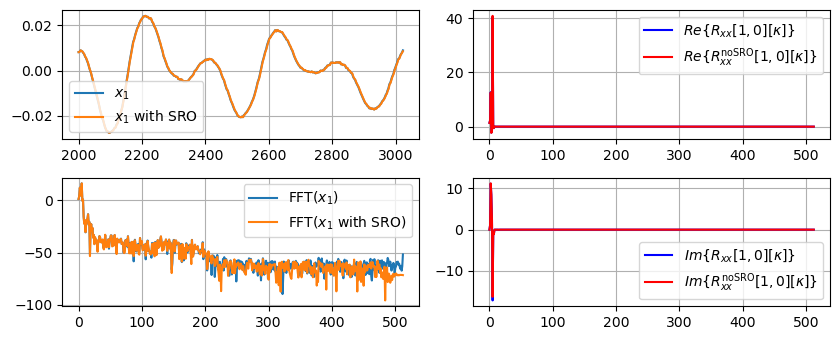

In [98]:
# Compute cross-correlation

# Get chunks
x1_chunk = x1[startidx - (N - Ns):startidx + Ns]
x2_chunk = x2rs[startidx - (N - Ns):startidx + Ns]
# Go to FD
X1_chunk = np.fft.fft(x1_chunk, N, axis=0)
X2_chunk = np.fft.fft(x2_chunk, N, axis=0)
# Keep only positive frequencies
X1_chunk = X1_chunk[:int(len(X1_chunk) // 2 + 1)]
X2_chunk = X2_chunk[:int(len(X2_chunk) // 2 + 1)]

# Compute correlation matrices for each freq. bin
Rxx = np.zeros((len(X1_chunk), 2, 2), dtype=complex)
Rxx_noSRO = np.zeros((len(X1_chunk), 2, 2), dtype=complex)
for kappa in range(len(X1_chunk)):
    vec = np.array([X1_chunk[kappa], X2_chunk[kappa]])
    Rxx[kappa, :, :] = np.outer(vec, vec)
    vec = np.array([X1_chunk[kappa], X1_chunk[kappa]])
    Rxx_noSRO[kappa, :, :] = np.outer(vec, vec)

fig, axes = plt.subplots(2,2)
fig.set_size_inches(8.5, 3.5)
axes[0,0].plot(np.arange(len(x1_chunk)) + startidx, x1_chunk, label='$x_1$')
axes[0,0].plot(np.arange(len(x1_chunk)) + startidx, x2_chunk, label='$x_1$ with SRO')
axes[0,0].grid()
axes[0,0].legend()
axes[1,0].plot(20*np.log10(np.abs(X1_chunk)), label='FFT($x_1$)')
axes[1,0].plot(20*np.log10(np.abs(X2_chunk)), label='FFT($x_1$ with SRO)')
axes[1,0].grid()
axes[1,0].legend()
axes[0,1].plot(np.real(Rxx[:, 1, 0]), 'b', label='$Re\\{{R_{{xx}}[1,0][\\kappa]\\}}$')
axes[0,1].plot(np.real(Rxx_noSRO[:, 1, 0]), 'r', label='$Re\\{{R_{{xx}}^{{\\mathrm{{no SRO}}}}[1,0][\\kappa]\\}}$')
axes[0,1].grid()
axes[0,1].legend()
axes[1,1].plot(np.imag(Rxx[:, 1, 0]), 'b', label='$Im\\{{R_{{xx}}[1,0][\\kappa]\\}}$')
axes[1,1].plot(np.imag(Rxx_noSRO[:, 1, 0]), 'r', label='$Im\\{{R_{{xx}}^{{\\mathrm{{no SRO}}}}[1,0][\\kappa]\\}}$')
axes[1,1].grid()
axes[1,1].legend()
plt.tight_layout()	
plt.show()

In [92]:
startidx - (N - Ns)

-1003